# Determining Where in the World to Open a New Burger Restaurant


## 1. Introduction/Business Problem

### 1.1. Background

Global franchises such as McDonald’s and Kentucky Fried Chicken are constantly expanding their franchises across the world.  For example, McDonald’s restaurants can be found in countries as diverse as Italy, the United States of America, and Bahrain.  Each time a new restaurant is opened, care has to be taken to ensure it is opened in a location that is both geographically and culturally conducive to its success.  For example, it would be a poor business decision to open a burger restaurant in a location that is widely known for practicing veganism. In other words, the financial success of each franchise depends on its location.  Therefore, the financial success of the company as a whole depends on the locations of each of its franchises.  In this project, the neighborhoods in three different cities will be assessed regarding their suitability as locations for a new burger restaurant.  These cities are Paris, France; Tokyo, Japan; and Doha, Qatar.  

### 1.2 Problem

Cities across the world are characterized not only by different geographic locations but also by vastly different cultures.  In order to launch a successful restaurant in a city, the restaurant must be compatible with the cultural values of the neighborhood in which it is located.  This project aims to determine in which neighborhood(s) of Paris, Tokyo, and Doha it would be appropriate to open a new burger restaurant.

### 1.3 Interest

The importance of this project is in its value to restauranteurs and frachisee’s.  If an algorithm can be produced which allows for easy evaluation of neighborhoods in cities for potential burger restaurants, this would be useful for burger chains, like McDonald’s. <b>The stakeholders are fast food burger franchises, including companies like McDonald's and Burger King.</b>  If the correct location for a restaurant can be found, it will lead to increased profits for the stakeholders.  If the incorrect location is chosen, it could lead to monetary losses for the stakeholders.

## 2. Data Acquisition and Cleaning

Download all dependencies that will be needed.

In [15]:
!conda update -n base -c defaults conda --yes

import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    chardet-3.0.4              |        py37_1003         174 KB
    ------------------------------------------------------------
                                           Total:         174 KB

The following packages will be REMOVED:

  _libgcc_mutex-0.1-main
  conda-env-2.6.0-1

The following packages will be UPDATED:

  chardet                                      3.0.4-py37_1 --> 3.0.4-py37_1003
  libstdcxx-ng                             8.2.0-hdf63c60_1 --> 9.1.0-hdf63c60_0
  openssl                                 1.1.1e-h7b6447c_0 --> 1.1.1f-h7b6447c_0
  pysocks                                      1.6.8-py37_0 --> 1.7.1-py37_0
  requests                                    2.21.0-py37_0 --> 2.23.0-py37_0
  ruamel_yam

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/chardet-3.0.4-py37_1003/lib/python3.7/site-packages/chardet/escsm.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/chardet-3.0.4-py37_1003/lib/python3.7/site-packages/chardet/langcyrillicmodel.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/chardet-3.0.4-py37_1003/lib/python3.7/site-packages/chardet/euckrprober.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/chardet-3.0.4-py37_1003/lib/python3.7/site-packages/chardet/gb2312freq.py.  Please remove th

<a id='item1'></a>

### 2.1 Data Sources

Data regarding the neighborhoods that comprise Paris, France; Tokyo, Japan; and Doha, Qatar are available in tabular format from Wikipedia at the following web addresses:

https://en.wikipedia.org/wiki/Arrondissements_of_Paris  

https://en.wikipedia.org/wiki/Special_wards_of_Tokyo 

https://en.wikipedia.org/wiki/List_of_communities_in_Doha 

The tables included in these web address contain information regarding the names of neighborhoods (i.e., arrondissements, special wards, or communities) in each of these cities.  However, they lack information about nearby venues, such as restaurants or gymnasiums.  In order to include this data, it will be obtained using the <b>Foursquare API</b>.  Likewise, the tables in the web addresses are missing data regarding the latitudes and longitudes of each neighborhood, which will be obtained using the <b>Geolocation API</b>.

### 2.1 Data Cleaning

Although the tables provided by Wikipedia contain information about the names of the neighborhoods, they also contain much superfluous data, such as the names of the mayors of the neighborhoods. The dataframes scraped from these tables will, therefore, be cleaned of superfluous data so that the resulting dataframes contain only information about the names of the neighborhoods and their numbers or boroughs. Then, latitudes and longitudes for each neighborhood will be added to the dataframe using the Geolocator API.

After that, the dataframes will be appended to include information about nearby venues using the Foursquare API. Any missing data will be dropped from the dataframes, for adding erroneous placeholder values to the dataframes could skew the outcome of clustering, detrimentally affecting our choice of the best neighborhood(s) for a new burger restaurant.

Finally, in order to prepare the dataframes for K means clustering, one hot encoding will employed to each dataframe, and the frequency of occurnce of each venue will be determined. Finally, K-means clustering will be applied to each dataframe to group similar neighborhoods in each city together.

### 2.1 Feature Selection

Although the tables provided by Wikipedia contain information about the names of the neighborhoods, they also contain much superfluous data, such as the names of the mayors of the neighborhoods.  The dataframes scraped from these tables will, therefore, be cleaned of superfluous data so that the resulting dataframes contain only information about the names of the neighborhoods and their numbers or boroughs.  Then, latitudes and longitudes for each neighborhood will be added to the dataframe using the Geolocator API.

After that, the dataframes will be appended to include information about nearby venues using the Foursquare API. Any missing data will be dropped from the dataframes, for adding erroneous placeholder values to the dataframes could skew the outcome of clustering, detrimentally affecting our choice of the best neighborhood(s) for a new burger restaurant.

Finally, in order to prepare the dataframes for K means clustering, one hot encoding will employed to each dataframe, and the frequency of occurnce of each venue will be determined.  Finally, K-means clustering will be applied to each dataframe to group similar neighborhoods in each city together.

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Paris</font></h1>

### Load data from Wikipedia into a pandas dataframe

In [16]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

wiki = "https://en.wikipedia.org/wiki/Arrondissements_of_Paris"

page = urllib.request.urlopen(wiki)

soup = BeautifulSoup(page, "lxml")

table_classes = {"class": ["wikitable sortable"]}
table = soup.find("table", table_classes)


A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==8:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        
paris_df=pd.DataFrame(A,columns=['Arrondissement'])
paris_df['Neighborhood']=B
paris_df['Area']=C
paris_df['Population_1999']=D
paris_df['Population_2005']=E
paris_df['Density_2005']=F
paris_df['Peak_of_population']=G
paris_df['Mayor']=H

paris_df.head(12)        


,Arrondissement,Neighborhood,Area,Population_1999,Population_2005,Density_2005,Peak_of_population,Mayor
0,1st (I,Louvre,1.826 km,"16,888","17,700","9,693",before 1861,Jean-François Legaret
1,2nd (II,Bourse,0.992 km,"19,585","20,700","20,867",before 1861,Jacques Boutault
2,3rd (III,Temple,1.171 km,"34,248","35,100","29,974",before 1861,Pierre Aidenbaum
3,4th (IV,Hôtel-de-Ville,1.601 km,"30,675","28,600","17,864",before 1861,Ariel Weil
4,5th (V,Panthéon,2.541 km,"58,849","60,600","23,849",1911,Florence Berthout
5,6th (VI,Luxembourg,2.154 km,"44,919","45,200","20,984",1911,Jean-Pierre Lecoq
6,7th (VII,Palais-Bourbon,4.088 km,"56,985","55,400","13,552",1926,Rachida Dati
7,8th (VIII,Élysée,3.881 km,"39,314","38,700","9,972",1891,Jeanne d'Hauteserre
8,9th (IX,Opéra,2.179 km,"55,838","58,500","26,847",1901,Delphine Bürkli
9,10th (X,Entrepôt,2.892 km,"89,612","88,800","30,705",1881,Alexandra Cordebard


### Data Cleaning: Remove columns containing unecessary information

In [17]:
del paris_df['Area']
del paris_df['Population_1999']
del paris_df['Population_2005'] 
del paris_df['Density_2005'] 
del paris_df['Peak_of_population']
del paris_df['Mayor'] 
paris_df['City']='Paris'


paris_df.head()

,Arrondissement,Neighborhood,City
0,1st (I,Louvre,Paris
1,2nd (II,Bourse,Paris
2,3rd (III,Temple,Paris
3,4th (IV,Hôtel-de-Ville,Paris
4,5th (V,Panthéon,Paris


### Use the Geolocator API to find the Latitudes and Longitudes

Append the data frame with the location data

In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
paris_df['address']=paris_df.Neighborhood + ", " + paris_df.City

paris_df['gcode'] = paris_df.address.apply(geolocator.geocode)
paris_df['Latitude'] = [g.latitude for g in paris_df.gcode]
paris_df['Longitude'] = [g.longitude for g in paris_df.gcode]

del paris_df['gcode']
del paris_df['City']
del paris_df['address']

paris_df.head()


,Arrondissement,Neighborhood,Latitude,Longitude
0,1st (I,Louvre,48.861147,2.338028
1,2nd (II,Bourse,48.868630,2.341474
2,3rd (III,Temple,48.866500,2.360708
3,4th (IV,Hôtel-de-Ville,48.856426,2.352528
4,5th (V,Panthéon,48.846191,2.346079


Find the overall location of Paris so that all of the neighborhoods can be mapped

In [20]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
paris_latitude = location.latitude
paris_longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(paris_latitude, paris_longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


### Generate initial map of the neighborhoods

In [21]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(paris_df['Latitude'], paris_df['Longitude'], paris_df['Arrondissement'], paris_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

### Define credentials necessary to call Fousquare API

In [22]:
CLIENT_ID = 'HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0' 
CLIENT_SECRET = 'B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0
CLIENT_SECRET:B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF


Explore the first neighborhood in the dataframe

In [23]:
paris_df.loc[0, 'Neighborhood']

'Louvre'

Get the latitude and longitude values for the neighborhood

In [24]:
paris_neighborhood_latitude = paris_df.loc[0, 'Latitude'] # neighborhood latitude value
paris_neighborhood_longitude = paris_df.loc[0, 'Longitude'] # neighborhood longitude value

paris_neighborhood_name = paris_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(paris_neighborhood_name, 
                                                               paris_neighborhood_latitude, 
                                                               paris_neighborhood_longitude))

Latitude and longitude values of Louvre are 48.8611473, 2.33802768704666.


#### Get the top 100 venues that are in Louvre within a radius of 500 meters

Create the GET request URL for Foursquare

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    paris_neighborhood_latitude, 
    paris_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0&client_secret=B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF&v=20180605&ll=48.8611473,2.33802768704666&radius=500&limit=100'

Send the GET request to Foursquare and display the results

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8a7a2698205d001b0605fa'},
 'response': {'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 68,
  'suggestedBounds': {'ne': {'lat': 48.8656473045, 'lng': 2.344855012527194},
   'sw': {'lat': 48.8566472955, 'lng': 2.331200361566126}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c079d740ed3c928b6be797d',
       'name': 'Cour Carrée du Louvre',
       'location': {'address': 'Rue de Rivoli',
        'crossStreet': 'Place du Louvre',
        'lat': 48.8603598795578,
        'lng': 2.3385429382324214,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8603598795578,
          'lng': 2.3385429382324214}],
        'distance': 95,
        'postalCode': '7

Get the categories of the venues

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Pass the categories of the venues into a pandas dataframe

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cour Carrée du Louvre,Pedestrian Plaza,48.860360,2.338543
1,Musée du Louvre,Art Museum,48.860847,2.336440
2,La Vénus de Milo (Vénus de Milo),Exhibit,48.859943,2.337234
3,Place du Palais Royal,Plaza,48.862523,2.336688
4,Cour Napoléon,Plaza,48.861172,2.335088


Print the number of venues

In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

68 venues were returned by Foursquare.


Repeat the process to get the venues for all of the neighborhoods in Paris

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
paris_venues = getNearbyVenues(names=paris_df['Neighborhood'],
                                   latitudes=paris_df['Latitude'],
                                   longitudes=paris_df['Longitude']
                                  )



Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


Display the resultant dataframe

In [32]:
print(paris_venues.shape)
paris_venues.head()

(1232, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.861147,2.338028,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Louvre,48.861147,2.338028,Musée du Louvre,48.860847,2.336440,Art Museum
2,Louvre,48.861147,2.338028,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Louvre,48.861147,2.338028,Place du Palais Royal,48.862523,2.336688,Plaza
4,Louvre,48.861147,2.338028,Cour Napoléon,48.861172,2.335088,Plaza


Display the number of venues in each neighborhood

In [33]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,69,69,69,69,69,69
Bourse,100,100,100,100,100,100
Butte-Montmartre,42,42,42,42,42,42
Buttes-Chaumont,36,36,36,36,36,36
Entrepôt,100,100,100,100,100,100
Gobelins,37,37,37,37,37,37
Hôtel-de-Ville,100,100,100,100,100,100
Louvre,68,68,68,68,68,68
Luxembourg,10,10,10,10,10,10


Determine how many unique categories of venues there are

In [34]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 225 uniques categories.


### Apply one hot encoding to each neighborhood

In [35]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burgundian Restaurant,Bus Stop,Butcher,Café,Cambodian Restaurant,Camera Store,Canal Lock,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Determine the size of the dataframe

In [36]:
paris_onehot.shape

(1232, 226)

Group the rows by neighborhood and get the mean and frequency of each venue

In [37]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burgundian Restaurant,Bus Stop,Butcher,Café,Cambodian Restaurant,Camera Store,Canal Lock,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,English Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Mac & Cheese Joint,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Batignolles-Monceau,0.000000,0.014493,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.043478,0.000000,0.014493,0.000000,0.000000,0.00000,0.000000,0.000000,0.057971,0.000000,0.000000,0.000000,0.000000,0.00,0.014493,0.00,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.014493,0.000000,0.000000,0.000000,0.00,0.0,0.00000,0.000000,0.014493,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.00,0.014493,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.00,0.000000,0.014493,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.217391,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00000

In [38]:
paris_grouped.shape

(20, 226)

### Find the top 5 venues for each neighborhood

In [39]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
               venue  freq
0  French Restaurant  0.22
1              Hotel  0.06
2             Bistro  0.06
3        Pizza Place  0.06
4   Sushi Restaurant  0.04


----Bourse----
                 venue  freq
0    French Restaurant  0.09
1               Bistro  0.06
2                Hotel  0.06
3  Japanese Restaurant  0.05
4             Wine Bar  0.05


----Butte-Montmartre----
                   venue  freq
0                    Bar  0.14
1      French Restaurant  0.14
2             Restaurant  0.05
3            Pizza Place  0.05
4  Vietnamese Restaurant  0.05


----Buttes-Chaumont----
                venue  freq
0   French Restaurant  0.28
1          Restaurant  0.06
2  Italian Restaurant  0.06
3                Park  0.06
4                Pool  0.06


----Entrepôt----
               venue  freq
0  French Restaurant  0.12
1        Coffee Shop  0.05
2  Indian Restaurant  0.04
3               Café  0.04
4              Hotel  0.04


----Gobelins----
            

Sort venues in descending order and display top 10 venues in each neighborhood

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
paris_neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Bistro,Pizza Place,Hotel,Bakery,Sushi Restaurant,Italian Restaurant,Steakhouse,Japanese Restaurant,Mediterranean Restaurant
1,Bourse,French Restaurant,Hotel,Bistro,Wine Bar,Japanese Restaurant,Cocktail Bar,Coffee Shop,Bakery,Mexican Restaurant,Salad Place
2,Butte-Montmartre,Bar,French Restaurant,Restaurant,Vietnamese Restaurant,Pizza Place,Convenience Store,Coffee Shop,Seafood Restaurant,Sandwich Place,Gastropub
3,Buttes-Chaumont,French Restaurant,Italian Restaurant,Pool,Bar,Park,Restaurant,Skating Rink,Plaza,Latin American Restaurant,Beer Garden
4,Entrepôt,French Restaurant,Coffee Shop,Bistro,Bar,Hotel,Café,Indian Restaurant,Japanese Restaurant,Pizza Place,Cocktail Bar


## Cluster Neighborhoods using K Means Clustering

In [42]:
# set number of clusters
kclusters = 2

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

In [43]:
# add clustering labels
paris_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_df

# merge paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() 

,Arrondissement,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st (I,Louvre,48.861147,2.338028,1,French Restaurant,Café,Coffee Shop,Art Museum,Hotel,Cosmetics Shop,Plaza,Historic Site,Bistro,Furniture / Home Store
1,2nd (II,Bourse,48.868630,2.341474,1,French Restaurant,Hotel,Bistro,Wine Bar,Japanese Restaurant,Cocktail Bar,Coffee Shop,Bakery,Mexican Restaurant,Salad Place
2,3rd (III,Temple,48.866500,2.360708,1,French Restaurant,Hotel,Wine Bar,Bistro,Restaurant,Art Gallery,Italian Restaurant,Bakery,Sandwich Place,Vietnamese Restaurant
3,4th (IV,Hôtel-de-Ville,48.856426,2.352528,1,French Restaurant,Ice Cream Shop,Plaza,Gay Bar,Wine Bar,Art Gallery,Cosmetics Shop,Tea Room,Furniture / Home Store,Pub
4,5th (V,Panthéon,48.846191,2.346079,1,French Restaurant,Bar,Hotel,Italian Restaurant,Bakery,Indie Movie Theater,Creperie,Pub,Burger Joint,Ice Cream Shop


### Check that the number of clusters is optimum

In [44]:
import matplotlib.pyplot as plt  
from matplotlib import style 

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    Z=paris_merged[['Latitude','Longitude']]
    KM.fit(Z) 
    cost.append(KM.inertia_)      
   
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("") 
plt.show() 
  
# The optimum value for k is aat the point in the elbow.  In this case, that point occurs at k=2

<Figure size 640x480 with 1 Axes>

## Print map of the clusters

In [45]:
# create map
map_clusters = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Each Cluster

In [46]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Luxembourg,French Restaurant,Restaurant,Italian Restaurant,Bakery,Casino,Resort,Hot Spring,Hotel,Food & Drink Shop,Flower Shop
6,Palais-Bourbon,French Restaurant,Plaza,Italian Restaurant,Pedestrian Plaza,Food Truck,Hotel,Beer Garden,Fountain,Music Venue,Cultural Center
13,Observatoire,French Restaurant,Bakery,Hotel,Grocery Store,Thai Restaurant,Fried Chicken Joint,Modern European Restaurant,Brasserie,Food & Drink Shop,Café
16,Batignolles-Monceau,French Restaurant,Bistro,Pizza Place,Hotel,Bakery,Sushi Restaurant,Italian Restaurant,Steakhouse,Japanese Restaurant,Mediterranean Restaurant
18,Buttes-Chaumont,French Restaurant,Italian Restaurant,Pool,Bar,Park,Restaurant,Skating Rink,Plaza,Latin American Restaurant,Beer Garden


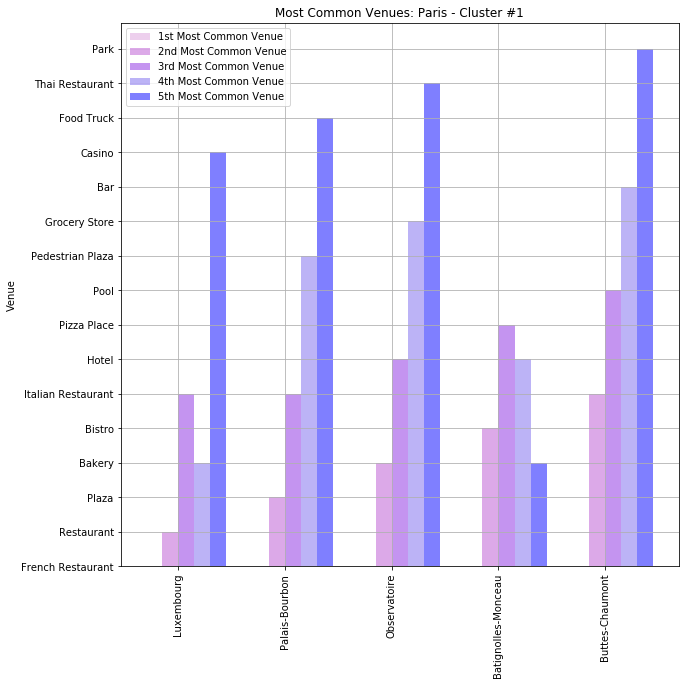

In [47]:
q=paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

pos = list(range(len(q['Neighborhood']))) 
width = 0.15
    
fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Paris - Cluster #1')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [48]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,French Restaurant,Café,Coffee Shop,Art Museum,Hotel,Cosmetics Shop,Plaza,Historic Site,Bistro,Furniture / Home Store
1,Bourse,French Restaurant,Hotel,Bistro,Wine Bar,Japanese Restaurant,Cocktail Bar,Coffee Shop,Bakery,Mexican Restaurant,Salad Place
2,Temple,French Restaurant,Hotel,Wine Bar,Bistro,Restaurant,Art Gallery,Italian Restaurant,Bakery,Sandwich Place,Vietnamese Restaurant
3,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Plaza,Gay Bar,Wine Bar,Art Gallery,Cosmetics Shop,Tea Room,Furniture / Home Store,Pub
4,Panthéon,French Restaurant,Bar,Hotel,Italian Restaurant,Bakery,Indie Movie Theater,Creperie,Pub,Burger Joint,Ice Cream Shop
7,Élysée,Hotel,French Restaurant,Sandwich Place,Coffee Shop,Bakery,Cocktail Bar,Bar,Train Station,Hotel Bar,Italian Restaurant
8,Opéra,Hotel,French Restaurant,Japanese Restaurant,Sandwich Place,Pastry Shop,Creperie,Clothing Store,Cocktail Bar,Gourmet Shop,Concert Hall
9,Entrepôt,French Restaurant,Coffee Shop,Bistro,Bar,Hotel,Café,Indian Restaurant,Japanese Restaurant,Pizza Place,Cocktail Bar
10,Popincourt,Restaurant,French Restaurant,Café,Wine Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Bistro,Pastry Shop,Afghan Restaurant
11,Reuilly,Theater,Playground,Botanical Garden,Comedy Club,Tennis Stadium,Fast Food Restaurant,Recreation Center,Bike Trail,Restaurant,Stadium


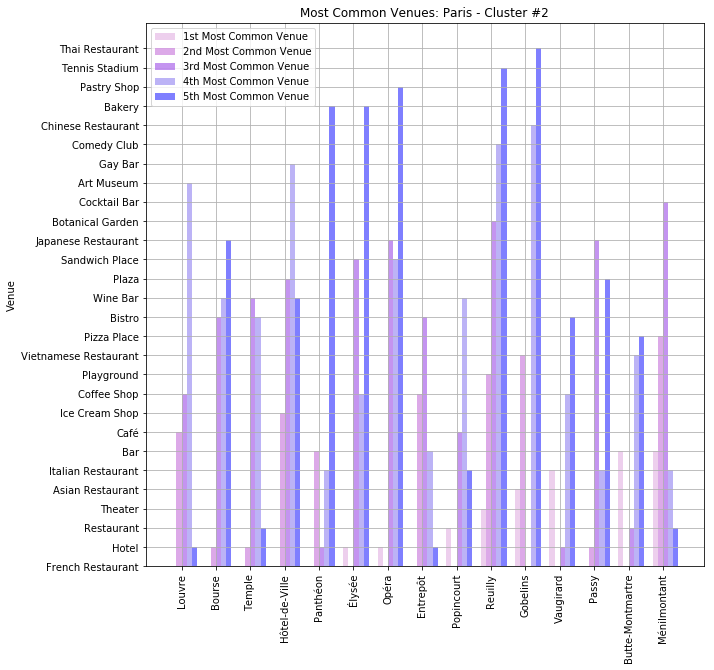

In [49]:
q=paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

pos = list(range(len(q['Neighborhood']))) 
width = 0.15
    
fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Paris - Cluster #2')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Tokyo</font></h1>

### Import data from Wikipedia and pass it into a pandas dataframe

In [50]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

wiki = "https://en.wikipedia.org/wiki/Special_wards_of_Tokyo"

page = urllib.request.urlopen(wiki)

soup = BeautifulSoup(page, "lxml")

table_classes = {"class": ["wikitable sortable"]}
table = soup.find("table", table_classes)
for strong_tag in soup.find_all('strong'):
    print(strong_tag.text, strong_tag.next_sibling)

A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==8:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        
        
jp_df=pd.DataFrame(A,columns=['Number'])
jp_df['Flag']=B
jp_df['Neighborhood']=C
jp_df['Kanji']=D
jp_df['Population_2016']=E
jp_df['Density']=F
jp_df['Area']=G
jp_df['Major_districts']=H

jp_df.head(12)  

,Number,Flag,Neighborhood,Kanji,Population_2016,Density,Area,Major_districts
0,01,None,Chiyoda,千代田区,0,0,0,Nagatachō
1,02,None,Chūō,中央区,0,"14,460",0,Nihonbashi
2,03,None,Minato,港区,0,"12,180",0,Odaiba
3,04,None,Shinjuku,新宿区,0,"18,620",0,Shinjuku
4,05,None,Bunkyō,文京区,0,"19,790",0,Hongō
5,06,None,Taitō,台東区,0,"19,830",0,Ueno
6,07,None,Sumida,墨田区,0,"18,910",0,Kinshichō
7,08,None,Kōtō,江東区,0,"12,510",0,Kiba
8,09,None,Shinagawa,品川区,0,"17,180",0,Shinagawa
9,10,None,Meguro,目黒区,0,"19,110",0,Meguro


### Clean the data of unnecessary information

In [51]:
del jp_df['Flag']
del jp_df['Kanji']
del jp_df['Population_2016']
del jp_df['Density']
del jp_df['Area']
del jp_df['Major_districts']
jp_df['City']='Tokyo'


jp_df.head(12)

,Number,Neighborhood,City
0,01,Chiyoda,Tokyo
1,02,Chūō,Tokyo
2,03,Minato,Tokyo
3,04,Shinjuku,Tokyo
4,05,Bunkyō,Tokyo
5,06,Taitō,Tokyo
6,07,Sumida,Tokyo
7,08,Kōtō,Tokyo
8,09,Shinagawa,Tokyo
9,10,Meguro,Tokyo


### Use the geolocator API to add the longitudes and latitudes to the dataframes

In [52]:
from geopy.geocoders import Nominatim
jp_df['address']=jp_df.Neighborhood + ", " + jp_df.City

jp_df['gcode'] = jp_df.address.apply(geolocator.geocode)
jp_df['Latitude'] = [g.latitude for g in jp_df.gcode]
jp_df['Longitude'] = [g.longitude for g in jp_df.gcode]

del jp_df['gcode']
del jp_df['City']
del jp_df['address']

jp_df.head()


,Number,Neighborhood,Latitude,Longitude
0,01,Chiyoda,35.677769,139.764636
1,02,Chūō,35.666255,139.775565
2,03,Minato,35.643227,139.740055
3,04,Shinjuku,35.693763,139.703632
4,05,Bunkyō,35.705571,139.751970


### Plot the neighborhoods on a map

In [53]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
jp_latitude = location.latitude
jp_longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(jp_latitude, jp_longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [54]:
# create map of Tokyo using latitude and longitude values
map_jp = folium.Map(location=[jp_latitude, jp_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(jp_df['Latitude'], jp_df['Longitude'], jp_df['Number'], jp_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jp)  
    
map_jp

### Call the Foursquare API to get information on the venues in Tokyo

In [55]:
CLIENT_ID = 'HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0' 
CLIENT_SECRET = 'B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0
CLIENT_SECRET:B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF


In [56]:
jp_df.loc[0, 'Neighborhood']

'Chiyoda'

In [57]:
jp_neighborhood_latitude = jp_df.loc[0, 'Latitude'] # neighborhood latitude value
jp_neighborhood_longitude = jp_df.loc[0, 'Longitude'] # neighborhood longitude value

jp_neighborhood_name = jp_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(jp_neighborhood_name, 
                                                               jp_neighborhood_latitude, 
                                                               jp_neighborhood_longitude))

Latitude and longitude values of Chiyoda are 35.6777691, 139.7646365.


In [58]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    jp_neighborhood_latitude, 
    jp_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0&client_secret=B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF&v=20180605&ll=35.6777691,139.7646365&radius=500&limit=100'

In [59]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8a7a5f882fc7001b1e055f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chūō',
  'headerFullLocation': 'Chūō, Tokyo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 243,
  'suggestedBounds': {'ne': {'lat': 35.6822691045, 'lng': 139.77016591996758},
   'sw': {'lat': 35.6732690955, 'lng': 139.7591070800324}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b584276f964a520f54f28e3',
       'name': 'Cotton Club',
       'location': {'address': '丸の内2-7-3',
        'crossStreet': '東京ビルTOKIA 2F',
        'lat': 35.67873304050466,
        'lng': 139.76523088254362,
        'labeledLatLngs': [{'label': 'display',
          'lat': 3

In [60]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [61]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cotton Club,Jazz Club,35.678733,139.765231
1,Indian Curry (インデアンカレー),Japanese Curry Restaurant,35.678395,139.765008
2,Mitsubishi Ichigokan Museum (三菱一号館美術館),Art Museum,35.678420,139.763260
3,Okonomiyaki Kiji (お好み焼 きじ),Okonomiyaki Restaurant,35.678097,139.764954
4,KITTE Garden (屋上庭園 KITTEガーデン),Garden,35.679654,139.765169


In [62]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
jp_venues = getNearbyVenues(names=jp_df['Neighborhood'],
                                   latitudes=jp_df['Latitude'],
                                   longitudes=jp_df['Longitude']
                                  )



Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ota
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


In [65]:
print(jp_venues.shape)
jp_venues.head()

(1333, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.677769,139.764636,Cotton Club,35.678733,139.765231,Jazz Club
1,Chiyoda,35.677769,139.764636,Indian Curry (インデアンカレー),35.678395,139.765008,Japanese Curry Restaurant
2,Chiyoda,35.677769,139.764636,Mitsubishi Ichigokan Museum (三菱一号館美術館),35.678420,139.763260,Art Museum
3,Chiyoda,35.677769,139.764636,Okonomiyaki Kiji (お好み焼 きじ),35.678097,139.764954,Okonomiyaki Restaurant
4,Chiyoda,35.677769,139.764636,KITTE Garden (屋上庭園 KITTEガーデン),35.679654,139.765169,Garden


In [66]:
jp_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adachi,100,100,100,100,100,100
Arakawa,33,33,33,33,33,33
Bunkyō,100,100,100,100,100,100
Chiyoda,100,100,100,100,100,100
Chūō,94,94,94,94,94,94
Edogawa,19,19,19,19,19,19
Itabashi,22,22,22,22,22,22
Katsushika,31,31,31,31,31,31
Kita,100,100,100,100,100,100


In [67]:
print('There are {} uniques categories.'.format(len(jp_venues['Venue Category'].unique())))

There are 197 uniques categories.


### Apply one hot encoding to the dataframe

In [68]:
# one hot encoding
jp_onehot = pd.get_dummies(jp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jp_onehot['Neighborhood'] = jp_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jp_onehot.columns[-1]] + list(jp_onehot.columns[:-1])
jp_onehot = jp_onehot[fixed_columns]

jp_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Betting Shop,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Canal,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Lake,Leather Goods Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Monjayaki Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roller Rink,Rugby Pitch,Russian Restaurant,Sake Bar,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
jp_onehot.shape

(1333, 198)

In [70]:
jp_grouped = jp_onehot.groupby('Neighborhood').mean().reset_index()
jp_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Betting Shop,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Canal,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Lake,Leather Goods Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Monjayaki Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roller Rink,Rugby Pitch,Russian Restaurant,Sake Bar,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.000000,0.00,0.00,0.01,0.00,0.00,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000,0.00,0.000000,0.000000,0.020000,0.00,0.000000,0.000000,0.01,0.01,0.000000,0.00,0.000000,0.01,0.020000,0.000000,0.000000,0.080000,0.0000,0.040000,0.02,0.02,0.00,0.040000,0.00000,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.00,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.050000,0.01,0.00,0.010000,0.00,0.000000,0.02,0.000000,0.020000,0.010000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.010000,0.050000,0.01000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.01,0.00,0.000000,0.000000,0.00,0.010000,0.01000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.010000,0.040000,0.00,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.00,0.01,0.020000,0.00,0.000000,0.000000,0.00,0.02,0.010000,0.000000,0.01,0.000000,0

In [71]:
jp_grouped.shape

(23, 198)

### Find the top venues in each neighborhood

In [72]:
num_top_venues = 5

for hood in jp_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jp_grouped[jp_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                 venue  freq
0                 Café  0.08
1    French Restaurant  0.05
2  Japanese Restaurant  0.05
3     Ramen Restaurant  0.04
4          Coffee Shop  0.04


----Arakawa----
                venue  freq
0    Ramen Restaurant  0.12
1   Convenience Store  0.12
2       Grocery Store  0.09
3                Park  0.09
4  Chinese Restaurant  0.06


----Bunkyō----
                 venue  freq
0     Baseball Stadium  0.08
1  Japanese Restaurant  0.05
2         Concert Hall  0.04
3             Sake Bar  0.03
4          Coffee Shop  0.03


----Chiyoda----
                 venue  freq
0                 Café  0.08
1    French Restaurant  0.05
2  Japanese Restaurant  0.05
3     Ramen Restaurant  0.04
4          Coffee Shop  0.04


----Chūō----
                 venue  freq
0     Sushi Restaurant  0.22
1  Japanese Restaurant  0.14
2          Coffee Shop  0.04
3    Convenience Store  0.04
4      Soba Restaurant  0.04


----Edogawa----
               venue  freq
0       

In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
jp_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
jp_neighborhoods_venues_sorted['Neighborhood'] = jp_grouped['Neighborhood']

for ind in np.arange(jp_grouped.shape[0]):
    jp_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jp_grouped.iloc[ind, :], num_top_venues)

jp_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Café,Japanese Restaurant,French Restaurant,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Dessert Shop,Chocolate Shop,South Indian Restaurant
1,Arakawa,Convenience Store,Ramen Restaurant,Park,Grocery Store,Chinese Restaurant,Noodle House,Food & Drink Shop,Café,Pharmacy,Theater
2,Bunkyō,Baseball Stadium,Japanese Restaurant,Concert Hall,Coffee Shop,Sake Bar,Café,Ramen Restaurant,Theme Park Ride / Attraction,Italian Restaurant,Discount Store
3,Chiyoda,Café,Japanese Restaurant,French Restaurant,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Dessert Shop,Chocolate Shop,South Indian Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Convenience Store,Soba Restaurant,Coffee Shop,Italian Restaurant,Park,Donburi Restaurant,Bakery,Indian Restaurant


## Cluster the data using K Means Clustering

In [75]:
# set number of clusters
kclusters = 4

jp_grouped_clustering = jp_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 0, 2, 1, 3, 0, 2], dtype=int32)

In [76]:
# add clustering labels
jp_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jp_merged = jp_df

# merge jp_grouped with jp_data to add latitude/longitude for each neighborhood
jp_merged = jp_merged.join(jp_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jp_merged.head() # check the last columns!

,Number,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Chiyoda,35.677769,139.764636,0,Café,Japanese Restaurant,French Restaurant,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Dessert Shop,Chocolate Shop,South Indian Restaurant
1,02,Chūō,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Convenience Store,Soba Restaurant,Coffee Shop,Italian Restaurant,Park,Donburi Restaurant,Bakery,Indian Restaurant
2,03,Minato,35.643227,139.740055,3,Convenience Store,Soba Restaurant,Park,Kosher Restaurant,Grocery Store,Diner,Kaiseki Restaurant,Drugstore,French Restaurant,Hardware Store
3,04,Shinjuku,35.693763,139.703632,0,Bar,Sake Bar,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Chinese Restaurant,Yakitori Restaurant,Pub,Dessert Shop,Tonkatsu Restaurant
4,05,Bunkyō,35.705571,139.751970,0,Baseball Stadium,Japanese Restaurant,Concert Hall,Coffee Shop,Sake Bar,Café,Ramen Restaurant,Theme Park Ride / Attraction,Italian Restaurant,Discount Store


### Check that the clusters value is correct

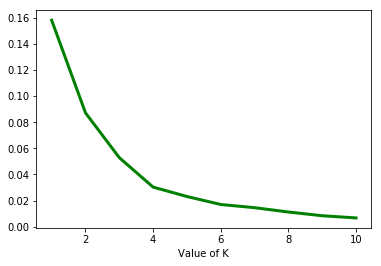

In [77]:
import matplotlib.pyplot as plt  
from matplotlib import style 

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    Z=jp_merged[['Latitude','Longitude']]
    KM.fit(Z) 
    cost.append(KM.inertia_)      
   
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("") 
plt.show() 
  
# The optimum value for k is aat the point in the elbow.  In this case, that point occurs at k=4

## Plot the clusters on a map

In [78]:
# create map
map_clusters = folium.Map(location=[jp_latitude, jp_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jp_merged['Latitude'], jp_merged['Longitude'], jp_merged['Neighborhood'], jp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine the Clusters

In [79]:
jp_merged.loc[jp_merged['Cluster Labels'] == 0, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,Café,Japanese Restaurant,French Restaurant,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Dessert Shop,Chocolate Shop,South Indian Restaurant
1,Chūō,Sushi Restaurant,Japanese Restaurant,Convenience Store,Soba Restaurant,Coffee Shop,Italian Restaurant,Park,Donburi Restaurant,Bakery,Indian Restaurant
3,Shinjuku,Bar,Sake Bar,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Chinese Restaurant,Yakitori Restaurant,Pub,Dessert Shop,Tonkatsu Restaurant
4,Bunkyō,Baseball Stadium,Japanese Restaurant,Concert Hall,Coffee Shop,Sake Bar,Café,Ramen Restaurant,Theme Park Ride / Attraction,Italian Restaurant,Discount Store
5,Taitō,Coffee Shop,Hotel,BBQ Joint,Convenience Store,Hostel,Ramen Restaurant,Sushi Restaurant,Café,Japanese Restaurant,Wagashi Place
10,Ota,Ramen Restaurant,Sake Bar,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Café,Sushi Restaurant,Bed & Breakfast,Park,Yakitori Restaurant
12,Shibuya,Café,Record Shop,Nightclub,Rock Club,BBQ Joint,Concert Hall,Ramen Restaurant,Chinese Restaurant,Clothing Store,Japanese Restaurant
14,Suginami,Ramen Restaurant,Grocery Store,Italian Restaurant,Sake Bar,Café,Shopping Mall,Japanese Restaurant,Chinese Restaurant,Steakhouse,Bus Stop
15,Toshima,Japanese Restaurant,Hobby Shop,Sushi Restaurant,Tonkatsu Restaurant,Dessert Shop,Café,Ramen Restaurant,Deli / Bodega,Hotel,Gift Shop
16,Kita,Café,Japanese Restaurant,French Restaurant,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Dessert Shop,Chocolate Shop,South Indian Restaurant


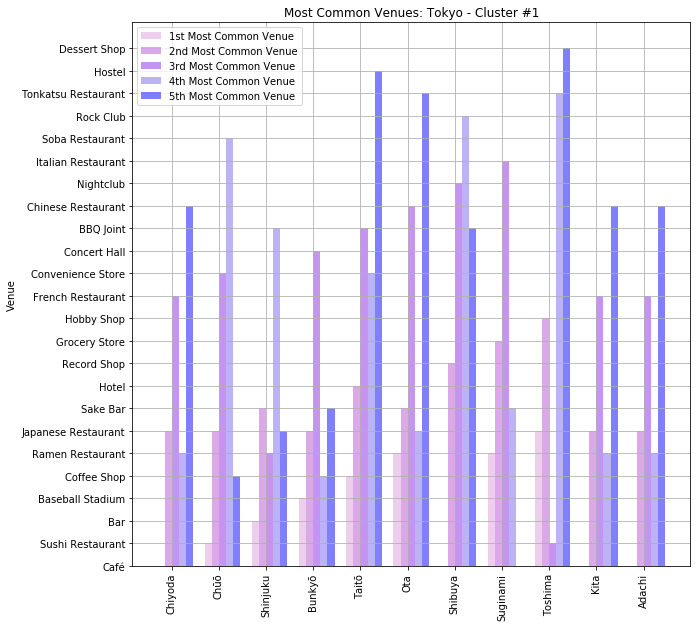

In [80]:
q=jp_merged.loc[jp_merged['Cluster Labels'] == 0, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

q.head(100)

pos = list(range(len(q['Neighborhood']))) 
width = 0.15

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood'][0]) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Tokyo - Cluster #1')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [81]:
jp_merged.loc[jp_merged['Cluster Labels'] == 1, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Shinagawa,Convenience Store,BBQ Joint,Grocery Store,Shopping Mall,Park,Canal,Bus Stop,Toll Booth,Restaurant,Drugstore
9,Meguro,Convenience Store,Bus Stop,Chinese Restaurant,Grocery Store,Coffee Shop,Japanese Restaurant,Shopping Mall,Men's Store,Outdoor Supply Store,Noodle House
13,Nakano,Convenience Store,Ramen Restaurant,BBQ Joint,Italian Restaurant,Grocery Store,Café,Chinese Restaurant,Park,Discount Store,Coffee Shop
17,Arakawa,Convenience Store,Ramen Restaurant,Park,Grocery Store,Chinese Restaurant,Noodle House,Food & Drink Shop,Café,Pharmacy,Theater
18,Itabashi,Convenience Store,Chinese Restaurant,Intersection,Park,Rest Area,Bus Stop,Supermarket,Golf Driving Range,Bowling Alley,Hobby Shop


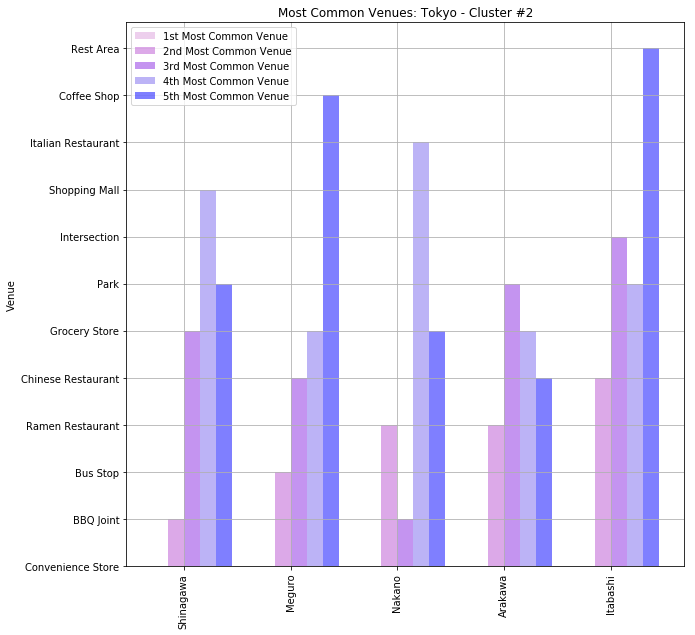

In [82]:
q=jp_merged.loc[jp_merged['Cluster Labels'] == 1, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]


pos = list(range(len(q['Neighborhood']))) 
width = 0.15

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Tokyo - Cluster #2')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [83]:
jp_merged.loc[jp_merged['Cluster Labels'] == 2, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kōtō,Intersection,Convenience Store,Bus Stop,Metro Station,Park,Rugby Pitch,Dog Run,Plaza,Platform,Café
19,Nerima,Convenience Store,Intersection,Café,Discount Store,BBQ Joint,Metro Station,Pharmacy,Chinese Restaurant,Bus Stop,Supermarket
22,Edogawa,Intersection,Baseball Field,Convenience Store,Bus Stop,Garden,Grocery Store,Train Station,BBQ Joint,Platform,Bistro


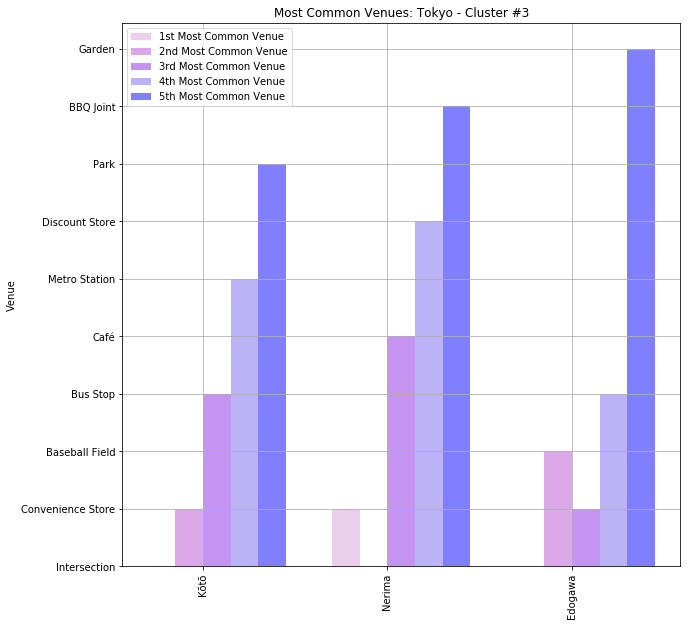

In [84]:
q=jp_merged.loc[jp_merged['Cluster Labels'] == 2, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

pos = list(range(len(q['Neighborhood']))) 
width = 0.15

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5,
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Tokyo - Cluster #3')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [85]:
jp_merged.loc[jp_merged['Cluster Labels'] == 3, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Minato,Convenience Store,Soba Restaurant,Park,Kosher Restaurant,Grocery Store,Diner,Kaiseki Restaurant,Drugstore,French Restaurant,Hardware Store
6,Sumida,Convenience Store,Sake Bar,Japanese Restaurant,BBQ Joint,Café,Toy / Game Store,Tonkatsu Restaurant,Park,Supermarket,Ramen Restaurant
11,Setagaya,Convenience Store,Café,Sake Bar,Ramen Restaurant,Tram Station,Bakery,Drugstore,Outdoor Sculpture,Grocery Store,Supermarket
21,Katsushika,Convenience Store,Train Station,Supermarket,Donburi Restaurant,Intersection,Chinese Restaurant,Park,Motel,Discount Store,Ramen Restaurant


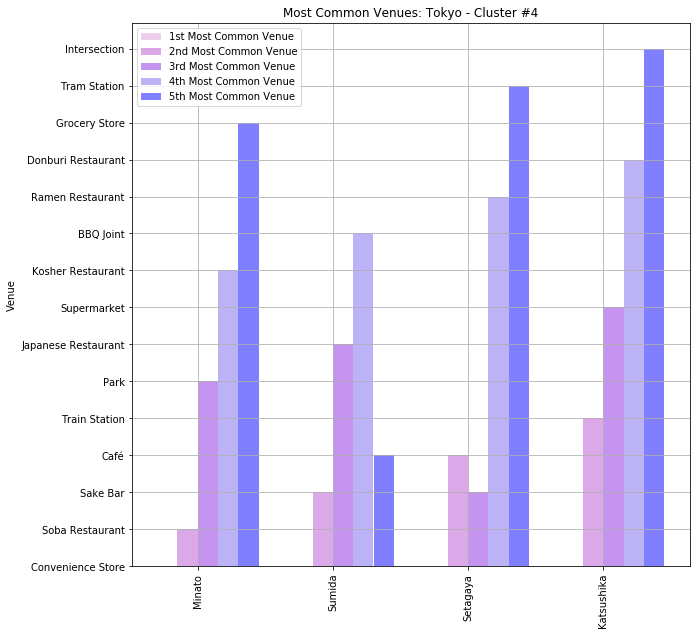

In [86]:
q=jp_merged.loc[jp_merged['Cluster Labels'] == 3, jp_merged.columns[[1] + list(range(5, jp_merged.shape[1]))]]


pos = list(range(len(q['Neighborhood']))) 
width = 0.15

fig, ax = plt.subplots(figsize=(10,10))
,
plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Tokyo - Cluster #4')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Doha</font></h1>


### Import the data for Doha from Wikipedia and pass it into a pandas dataframe

In [87]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

wiki = "https://en.wikipedia.org/wiki/List_of_communities_in_Doha"

page = urllib.request.urlopen(wiki)

soup = BeautifulSoup(page, "lxml")

table_classes = {"class": ["wikitable sortable"]}
table = soup.find("table", table_classes)
for strong_tag in soup.find_all('strong'):
    print(strong_tag.text, strong_tag.next_sibling)

A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        
        
d_df=pd.DataFrame(A,columns=['Neighborhood'])
d_df['Area']=B
d_df['Population']=C
d_df['Population Density']=D

d_df.head(12)  

,Neighborhood,Area,Population,Population Density
0,Al Bidda,0.8 km²,"1,067","1,398.0/km²"
1,Al Dafna,1.1 km²,19,17.7/km²
2,Ad Dawhah al Jadidah,0.5 km²,"13,059","27,358.5/km²"
3,Al Egla,None,None,
4,Al Hilal,1.8 km²,"11,257","6,393.4/km²"
5,Al Jasrah,0.4 km²,240,672.7/km²
6,Al Kharayej,None,None,
7,Al Khulaifat,None,None,
8,Al Mansoura,None,None,
9,Al Markhiya,2.7 km²,"5,197","1,894.2/km²"


### Remove unnecessary information from the dataframe

In [88]:
del d_df['Area']
del d_df['Population']
del d_df['Population Density']
d_df['City']='Doha'
d_df.insert(0,'Number','')
d_df['Number']='N/A'


d_df.head(12)

,Number,Neighborhood,City
0,N/A,Al Bidda,Doha
1,N/A,Al Dafna,Doha
2,N/A,Ad Dawhah al Jadidah,Doha
3,N/A,Al Egla,Doha
4,N/A,Al Hilal,Doha
5,N/A,Al Jasrah,Doha
6,N/A,Al Kharayej,Doha
7,N/A,Al Khulaifat,Doha
8,N/A,Al Mansoura,Doha
9,N/A,Al Markhiya,Doha


### Use the geolocator API to get the latitudes and longitudes

In [89]:
from geopy.geocoders import Nominatim
d_df['address']=d_df.Neighborhood + ", " + d_df.City
d_df['gcode'] = d_df.address.apply(geolocator.geocode)
d_df = d_df.dropna()

d_df['Latitude'] = [g.latitude for g in d_df.gcode]
d_df['Longitude'] = [g.longitude for g in d_df.gcode]

del d_df['gcode']
del d_df['City']
del d_df['address']

d_df.head(12)

,Number,Neighborhood,Latitude,Longitude
0,N/A,Al Bidda,25.293103,51.519360
1,N/A,Al Dafna,25.323485,51.528106
4,N/A,Al Hilal,25.260376,51.546488
6,N/A,Al Kharayej,25.209834,51.454955
7,N/A,Al Khulaifat,25.285061,51.552715
8,N/A,Al Mansoura,25.265651,51.532111
9,N/A,Al Markhiya,25.328166,51.493649
10,N/A,Al Messila,25.301739,51.482434
11,N/A,Al Mirqab,25.286498,51.533727
12,N/A,Al Najada,25.284399,51.531660


### Plot the neighborhoods on a map

In [90]:
address = 'Doha, Qatar'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
d_latitude = location.latitude
d_longitude = location.longitude
print('The geograpical coordinate of Doha are {}, {}.'.format(d_latitude, d_longitude))

The geograpical coordinate of Doha are 25.2856329, 51.5264162.


In [91]:
# create map of Doha using latitude and longitude values
map_d = folium.Map(location=[d_latitude, d_longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(d_df['Latitude'], d_df['Longitude'], d_df['Number'], d_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_d)  
    
map_d

### Use Foursquare API to get information about the venues in the neighborhoods

In [92]:
CLIENT_ID = 'HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0' 
CLIENT_SECRET = 'B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0
CLIENT_SECRET:B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF


In [93]:
d_df.loc[0, 'Neighborhood']

'Al Bidda'

In [94]:
d_neighborhood_latitude = d_df.loc[0, 'Latitude'] # neighborhood latitude value
d_neighborhood_longitude = d_df.loc[0, 'Longitude'] # neighborhood longitude value

d_neighborhood_name = d_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(d_neighborhood_name, 
                                                               d_neighborhood_latitude, 
                                                               d_neighborhood_longitude))

Latitude and longitude values of Al Bidda are 25.2931033, 51.5193599.


In [95]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    d_neighborhood_latitude, 
    d_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HHKIZ1FNPJU0QRBVB52HWTOI3FOS123NGGCUEJNB14YMXLN0&client_secret=B0N3W01X0DSV2KWP5CTTPCZN01XXAO0HMIQFRA00GUHSPUSF&v=20180605&ll=25.2931033,51.5193599&radius=500&limit=100'

In [96]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8a7c0ddf2774001c36cd93'},
 'response': {'headerLocation': 'Doha',
  'headerFullLocation': 'Doha',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 25.297603304500004,
    'lng': 51.524327750512235},
   'sw': {'lat': 25.288603295499993, 'lng': 51.51439204948776}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cf3cee9e3b9a09381a94b53',
       'name': 'Qatar Bowling Center',
       'location': {'address': 'Al Qurtubi St.',
        'lat': 25.291806007849605,
        'lng': 51.51596840618966,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.291806007849605,
          'lng': 51.51596840618966}],
        'distance': 370,
        'cc': 'QA',
        'city': 'الدوحة',
     

In [97]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [98]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Qatar Bowling Center,Bowling Alley,25.291806,51.515968
1,Al Bidda Metro Station,Metro Station,25.290444,51.520266
2,Al Bidda Park West Entrance,Park,25.290325,51.518556
3,QBC Doha,Bowling Alley,25.291730,51.516004


In [99]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [100]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [101]:
d_venues = getNearbyVenues(names=d_df['Neighborhood'],
                                   latitudes=d_df['Latitude'],
                                   longitudes=d_df['Longitude']
                                  )


Al Bidda
Al Dafna
Al Hilal
Al Kharayej
Al Khulaifat
Al Mansoura
Al Markhiya
Al Messila
Al Mirqab
Al Najada
Al Qassar
Al Rufaa
Al Sadd
Al Souq
Al Tarfa
Al Thumama
Barahat Al Jufairi
Doha International Airport
Doha Port
Duhail
Fereej Abdul Aziz
Fereej Al Nasr
Fereej Bin Mahmoud
Fereej Bin Omran
Fereej Kulaib
Hamad Medical City
Hazm Al Markhiya
Industrial Area
Jabal Thuaileb
Jelaiah
Jeryan Nejaima
Lejbailat
Lekhwair
Madinat Khalifa North
Madinat Khalifa South
Musheireb
Najma
New Al Hitmi
New Al Mirqab
New Salata
Nuaija
Old Airport
Old Al Ghanim
Old Al Hitmi
Onaiza
Rawdat Al Khail
Salata
Umm Ghuwailina
Umm Lekhba
Wadi Al Banat
Wadi Al Sail


In [102]:
print(d_venues.shape)
d_venues.head()

(845, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Al Bidda,25.293103,51.519360,Qatar Bowling Center,25.291806,51.515968,Bowling Alley
1,Al Bidda,25.293103,51.519360,Al Bidda Metro Station,25.290444,51.520266,Metro Station
2,Al Bidda,25.293103,51.519360,Al Bidda Park West Entrance,25.290325,51.518556,Park
3,Al Bidda,25.293103,51.519360,QBC Doha,25.291730,51.516004,Bowling Alley
4,Al Dafna,25.323485,51.528106,Gastronomy,25.322180,51.526240,Coffee Shop


In [103]:
d_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Al Bidda,4,4,4,4,4,4
Al Dafna,86,86,86,86,86,86
Al Hilal,5,5,5,5,5,5
Al Khulaifat,15,15,15,15,15,15
Al Mansoura,10,10,10,10,10,10
Al Markhiya,4,4,4,4,4,4
Al Messila,4,4,4,4,4,4
Al Mirqab,60,60,60,60,60,60
Al Najada,51,51,51,51,51,51


In [104]:
print('There are {} uniques categories.'.format(len(d_venues['Venue Category'].unique())))

There are 146 uniques categories.


### Apply one hot encoding to the dataframe

In [105]:
# one hot encoding
d_onehot = pd.get_dummies(d_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
d_onehot['Neighborhood'] = d_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [d_onehot.columns[-1]] + list(d_onehot.columns[:-1])
d_onehot = d_onehot[fixed_columns]

d_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Beach,Beer Garden,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Buffet,Building,Burger Joint,Bus Line,Cafeteria,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Movie Theater,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Other Repair Shop,Pakistani Restaurant,Palace,Park,Pastry Shop,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Pub,Racetrack,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,Al Bidda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Al Bidda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Al Bidda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Al Bidda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Al Dafna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
d_onehot.shape

(845, 147)

In [107]:
d_grouped = d_onehot.groupby('Neighborhood').mean().reset_index()
d_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Beach,Beer Garden,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Buffet,Building,Burger Joint,Bus Line,Cafeteria,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Korean Restaurant,Lebanese Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Movie Theater,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Other Repair Shop,Pakistani Restaurant,Palace,Park,Pastry Shop,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Pub,Racetrack,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,Al Bidda,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00
1,Al Dafna,0.00,0.011628,0.011628,0.011628,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.011628,0.000000,0.000000,0.011628,0.00,0.000000,0.011628,0.000000,0.000000,0.023256,0.023256,0.0,0.011628,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.081395,0.000000,0.023256,0.011628,0.011628,0.127907,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.011628,0.023256,0.000000,0.00,0.0,0.058140,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.011628,0.000000,0.000000,0.011628,0.000000,0.011628,0.011628,0.000000,0.000000,0.011628,0.034884,0.000000,0.000000,0.000000,0.000000,0.000000,0.069767,0.000000,0.000000,0.0,0.023256,0.000000,0.000000,0.000000,0.0

In [108]:
d_grouped.shape

(48, 147)

### Find the top venues in each neighborhood

In [109]:
num_top_venues = 5

for hood in d_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = d_grouped[d_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Al Bidda----
                     venue  freq
0            Bowling Alley  0.50
1            Metro Station  0.25
2                     Park  0.25
3        Afghan Restaurant  0.00
4  North Indian Restaurant  0.00


----Al Dafna----
                  venue  freq
0           Coffee Shop  0.13
1                  Café  0.08
2                 Hotel  0.07
3  Fast Food Restaurant  0.06
4    Italian Restaurant  0.05


----Al Hilal----
                           venue  freq
0           Fast Food Restaurant   0.2
1  Vegetarian / Vegan Restaurant   0.2
2               Department Store   0.2
3                  Jewelry Store   0.2
4                  Grocery Store   0.2


----Al Khulaifat----
                       venue  freq
0  Middle Eastern Restaurant  0.13
1                       Café  0.13
2                      Beach  0.13
3                  Hotel Bar  0.07
4                  Nightclub  0.07


----Al Mansoura----
                 venue  freq
0     Asian Restaurant   0.2
1  American Restaura

                           venue  freq
0              Indian Restaurant  0.15
1                          Hotel  0.15
2                            Gym  0.08
3  Vegetarian / Vegan Restaurant  0.08
4             Seafood Restaurant  0.08


----Salata----
                     venue  freq
0            Women's Store  0.25
1             Burger Joint  0.25
2          Harbor / Marina  0.25
3     Gym / Fitness Center  0.25
4  North Indian Restaurant  0.00


----Umm Ghuwailina----
                       venue  freq
0           Asian Restaurant   0.2
1      Indonesian Restaurant   0.1
2          Convenience Store   0.1
3                   Building   0.1
4  Middle Eastern Restaurant   0.1


----Umm Lekhba----
                     venue  freq
0             Dessert Shop  0.33
1  Health & Beauty Service  0.33
2              Supermarket  0.33
3  North Indian Restaurant  0.00
4        Mobile Phone Shop  0.00


----Wadi Al Banat----
                     venue  freq
0           Ice Cream Shop  0.33
1      

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
d_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
d_neighborhoods_venues_sorted['Neighborhood'] = d_grouped['Neighborhood']

for ind in np.arange(jp_grouped.shape[0]):
    d_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(d_grouped.iloc[ind, :], num_top_venues)

d_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Bidda,Bowling Alley,Park,Metro Station,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Food
1,Al Dafna,Coffee Shop,Café,Hotel,Fast Food Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sporting Goods Shop,Gym / Fitness Center,Boutique,Movie Theater
2,Al Hilal,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Grocery Store,Jewelry Store,Department Store,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm
3,Al Khulaifat,Café,Middle Eastern Restaurant,Beach,Hotel Bar,Spa,Nightclub,Fish & Chips Shop,Food,Lounge,Dessert Shop
4,Al Mansoura,Asian Restaurant,IT Services,Indian Restaurant,Convenience Store,Filipino Restaurant,Gym / Fitness Center,American Restaurant,Turkish Restaurant,Restaurant,Dessert Shop


## Cluster the neighborhoods using K Means Clustering

In [112]:
# set number of clusters
kclusters = 3

d_grouped_clustering = d_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(d_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 2, 0, 1, 0, 2, 2, 2], dtype=int32)

In [113]:
# add clustering labels
d_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

d_merged = d_df

# merge d_grouped with d_data to add latitude/longitude for each neighborhood
d_merged = d_merged.join(d_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

d_merged.head()

,Number,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,N/A,Al Bidda,25.293103,51.519360,0.0,Bowling Alley,Park,Metro Station,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Food
1,N/A,Al Dafna,25.323485,51.528106,2.0,Coffee Shop,Café,Hotel,Fast Food Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sporting Goods Shop,Gym / Fitness Center,Boutique,Movie Theater
4,N/A,Al Hilal,25.260376,51.546488,0.0,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Grocery Store,Jewelry Store,Department Store,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm
6,N/A,Al Kharayej,25.209834,51.454955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N/A,Al Khulaifat,25.285061,51.552715,2.0,Café,Middle Eastern Restaurant,Beach,Hotel Bar,Spa,Nightclub,Fish & Chips Shop,Food,Lounge,Dessert Shop


In [114]:
d_merged.dropna(how='any', inplace=True)
d_merged['Cluster Labels']=d_merged['Cluster Labels'].astype(int)
d_merged.head()

,Number,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,N/A,Al Bidda,25.293103,51.519360,0,Bowling Alley,Park,Metro Station,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Food
1,N/A,Al Dafna,25.323485,51.528106,2,Coffee Shop,Café,Hotel,Fast Food Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sporting Goods Shop,Gym / Fitness Center,Boutique,Movie Theater
4,N/A,Al Hilal,25.260376,51.546488,0,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Grocery Store,Jewelry Store,Department Store,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm
7,N/A,Al Khulaifat,25.285061,51.552715,2,Café,Middle Eastern Restaurant,Beach,Hotel Bar,Spa,Nightclub,Fish & Chips Shop,Food,Lounge,Dessert Shop
8,N/A,Al Mansoura,25.265651,51.532111,0,Asian Restaurant,IT Services,Indian Restaurant,Convenience Store,Filipino Restaurant,Gym / Fitness Center,American Restaurant,Turkish Restaurant,Restaurant,Dessert Shop


### Make sure that the number of clusters is correct

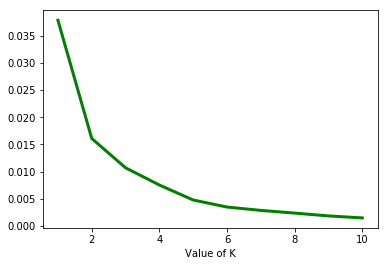

In [115]:
import matplotlib.pyplot as plt  
from matplotlib import style 

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    Z=d_merged[['Latitude','Longitude']]
    KM.fit(Z)  
    cost.append(KM.inertia_)      
   
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("") 
plt.show()  
  
# The optimum value for k is aat the point in the elbow.  In this case, that point occurs at k=5

## Plot the clusters on a map

In [116]:
# create map
map_clusters = folium.Map(location=[d_latitude, d_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(d_merged['Latitude'], d_merged['Longitude'], d_merged['Neighborhood'], d_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine the Clusters

In [117]:
d_merged.loc[d_merged['Cluster Labels'] == 0, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Bidda,Bowling Alley,Park,Metro Station,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Food
4,Al Hilal,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Grocery Store,Jewelry Store,Department Store,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm
8,Al Mansoura,Asian Restaurant,IT Services,Indian Restaurant,Convenience Store,Filipino Restaurant,Gym / Fitness Center,American Restaurant,Turkish Restaurant,Restaurant,Dessert Shop
10,Al Messila,Gym / Fitness Center,American Restaurant,Dessert Shop,Pool,Farm,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
15,Al Sadd,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Dessert Shop,Persian Restaurant,Café,Massage Studio,Salon / Barbershop,Sandwich Place,Department Store
18,Al Thumama,Convenience Store,Fast Food Restaurant,Coffee Shop,Shopping Mall,Market,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant
21,Doha International Airport,Fast Food Restaurant,Department Store,Women's Store,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant,Farmers Market
23,Duhail,Afghan Restaurant,Spa,French Restaurant,Flower Shop,Dessert Shop,Dog Run,Empanada Restaurant,Exhibit,Falafel Restaurant,Food
24,Fereej Abdul Aziz,Convenience Store,Seafood Restaurant,Hotel,Fried Chicken Joint,Indian Restaurant,Office,Clothing Store,Chaat Place,Falafel Restaurant,Filipino Restaurant
25,Fereej Al Nasr,Middle Eastern Restaurant,Coffee Shop,French Restaurant,Clothing Store,Chinese Restaurant,Mediterranean Restaurant,Pizza Place,Lebanese Restaurant,Bookstore,Café


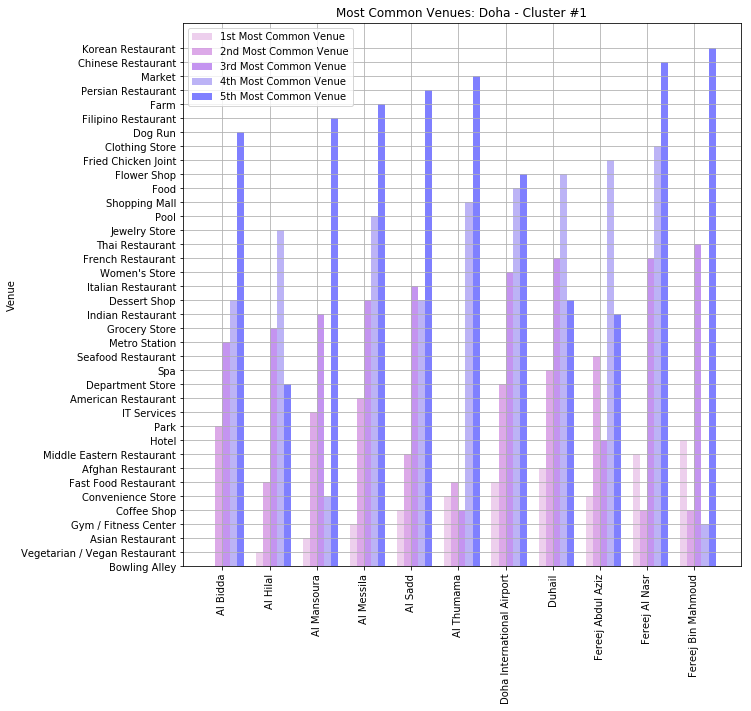

In [118]:
q=d_merged.loc[d_merged['Cluster Labels'] == 0, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]

q.head(100)

pos = list(range(len(q['Neighborhood']))) 
width = 0.15
    
fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood'][0]) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood'][0]) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Doha - Cluster #1')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [119]:
d_merged.loc[d_merged['Cluster Labels'] == 1, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Al Markhiya,Food Truck,Health & Beauty Service,Playground,Baseball Field,Women's Store,Farmers Market,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant


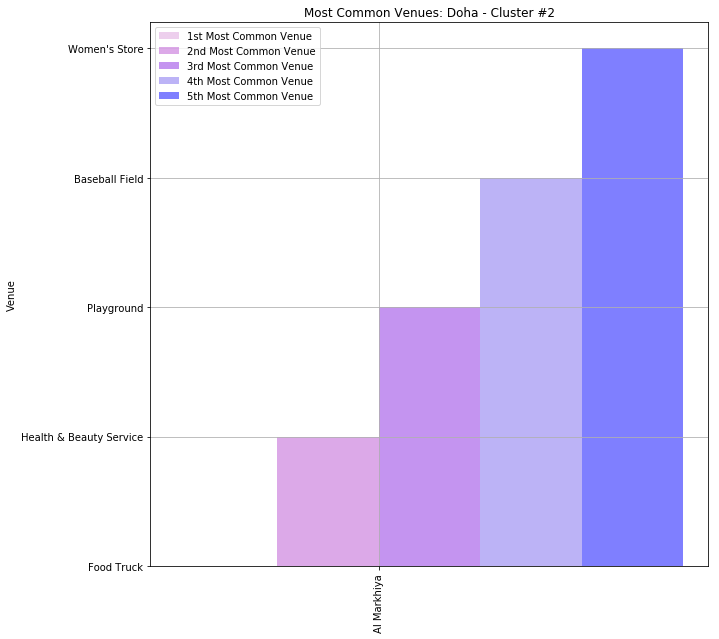

In [120]:
q=d_merged.loc[d_merged['Cluster Labels'] == 1, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]


pos = list(range(len(q['Neighborhood']))) 
width = 0.15
    
fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Doha - Cluster #2')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()




In [121]:
d_merged.loc[d_merged['Cluster Labels'] == 2, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Al Dafna,Coffee Shop,Café,Hotel,Fast Food Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sporting Goods Shop,Gym / Fitness Center,Boutique,Movie Theater
7,Al Khulaifat,Café,Middle Eastern Restaurant,Beach,Hotel Bar,Spa,Nightclub,Fish & Chips Shop,Food,Lounge,Dessert Shop
11,Al Mirqab,Café,Middle Eastern Restaurant,Hotel,Restaurant,Coffee Shop,Turkish Restaurant,Dessert Shop,Mediterranean Restaurant,Italian Restaurant,Flea Market
12,Al Najada,Café,Hotel,Restaurant,Middle Eastern Restaurant,Coffee Shop,Italian Restaurant,Dessert Shop,Turkish Restaurant,Argentinian Restaurant,Persian Restaurant
13,Al Qassar,Farmers Market,Steakhouse,Restaurant,Resort,Metro Station,Beach,Bookstore,Hotel,Coffee Shop,Ice Cream Shop
14,Al Rufaa,Hotel,Restaurant,Indian Restaurant,Middle Eastern Restaurant,Café,Fast Food Restaurant,Cafeteria,BBQ Joint,Pizza Place,Chinese Restaurant
16,Al Souq,Café,Hotel,Coffee Shop,Middle Eastern Restaurant,Restaurant,Jewelry Store,Flea Market,Museum,Dessert Shop,Hookah Bar
17,Al Tarfa,Coffee Shop,Sandwich Place,Café,Food Court,Health & Beauty Service,Flea Market,Department Store,Dessert Shop,Dog Run,Empanada Restaurant
19,Barahat Al Jufairi,Middle Eastern Restaurant,Café,Hotel,Coffee Shop,Restaurant,Italian Restaurant,BBQ Joint,Dessert Shop,Turkish Restaurant,Art Gallery
22,Doha Port,Hotel,Harbor / Marina,Restaurant,Fish Market,Cocktail Bar,Café,Museum,Middle Eastern Restaurant,Park,Art Gallery


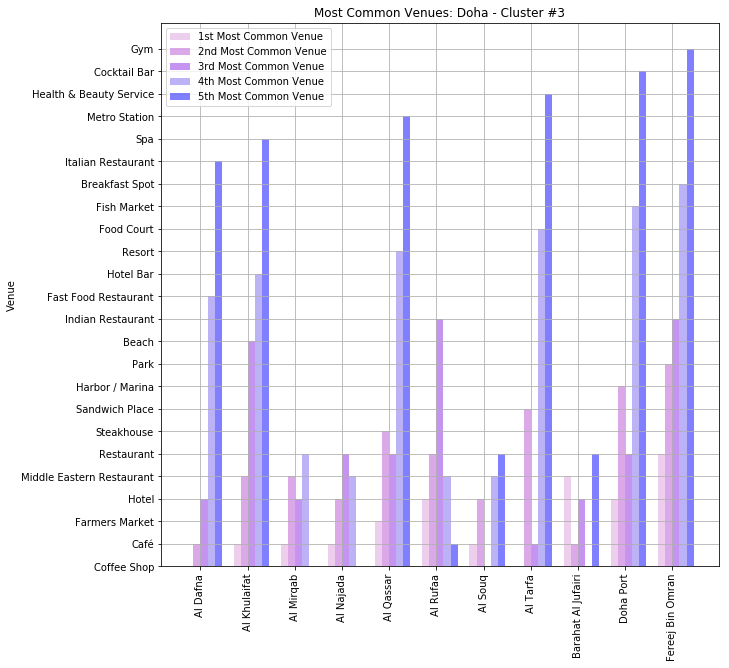

In [122]:
q=d_merged.loc[d_merged['Cluster Labels'] == 2, d_merged.columns[[1] + list(range(5, d_merged.shape[1]))]]

pos = list(range(len(q['Neighborhood']))) 
width = 0.15
  
fig, ax = plt.subplots(figsize=(10,10))

plt.bar(pos, 
        q['1st Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='plum', 
        label=q['Neighborhood']) 

plt.bar([p + width for p in pos], 
        q['2nd Most Common Venue'],
        width, 
        alpha=0.5, 
        color='mediumorchid', 
        label=q['Neighborhood']) 

plt.bar([p + width*2 for p in pos], 
        q['3rd Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='blueviolet', 
        label=q['Neighborhood']) 

plt.bar([p + width*3 for p in pos], 
        q['4th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='mediumslateblue', 
        label=q['Neighborhood']) 

plt.bar([p + width*4 for p in pos], 
        q['5th Most Common Venue'], 
        width, 
        alpha=0.5, 
        color='b', 
        label=q['Neighborhood']) 

ax.set_ylabel('Venue')

ax.set_title('Most Common Venues: Doha - Cluster #3')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(q['Neighborhood'], rotation=90)

plt.xlim()
plt.ylim()

plt.legend(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue'], loc='upper left')
plt.grid()
plt.show()


